# Discrete Random Variables

In this Series we are going to look at some properties of discrete random variables that will be useful for the future Series on classification metrics. The rigorous mathematical theory behind random variables is clearly indigest, and we are not going to look into it, because we don't need it. Instead, we are going to define a random variable as a simple numerical variable, the value of which is impossible to predict. We won't need more than this definition.

## 1. Definition
> **A random variable $X$ is a numerical variable, the value of which, determined by the result of an experiment, is impossible to predict. The random variable is said to be discrete if the number of its realizations is countable**.

Examples:
- Throw a dice, the variable $X$ associated to the face obtained is a discrete random variable. $X\in [1,2,3,4,5,6]$.
- Any binary variable $X$ is a quantitative discrete variable, e.g. sick/not sick, open/closed, left/right, green/red, woman/man, etc. In this case, $X\in\{0,1\}$.

For each of the realization $x_i$ of the random variable $X$, we can define a **probability of occurence** $p_i=P(X=x_i)$, whose range is between $0$ and $1$. This reads "$p_i$ is the probability that $X$ equals $x_i$".

For instance, when we throw a dice, we have $p_4 = P(X=4)=1/6$.

> **The set of all pairs $(x_i,p_i)$ forms a probability distribution if $\forall i, \sum p_i=1$**.

In other words, when we sum all probabilities of all realizations of $X$, we obtain $100\%$.

Note that there are two ways of defining a probability:
1. The **Bayes** way: for Bayes, the probability of an event is defined as the **degree of confidence** that this event is going to occur. For instance, when we say there's a 40% probability that it's going to rain tomorrow, this is a Bayesian probability. We are 40% confident that it's going to rain.
2. The **Laplace** way: because Laplace did not understand Bayesian probabilities, he formulated them in terms of the **frequency of occurrence**. For instance, when we say there's a 50% chance of having tails in a coin toss, this is a Laplacian probability. If we repeat this experience 10.000 times, we will, on average, get 5.000 tails. The Laplacian view of probabilities is more intuitive, but cannot account for all probabilities. For instance, it is impossible to interpret a 40% chance of raining in terms of Laplacian probabilities.

Later in these Series, when we deal with accuracy metrics in machine learning, we will mainly use Laplacian probabilities.

When dealing with discrete random variables, it is useful to gather all pairs $(x_i,p_i)$ in a lookup table:

<img src='img/01.01.lookup_table.png' width='400'/>

> **The graphical representation of a random discrete variable is a histogram**.

## 2. Example: Throwing a dice
- The experiment: the throw of a dice.
- The random variable $X$ is the result of the dice throw.
- Realizations of $X=\{1,2,3,4,5,6\}$. This is countable so $X$ is a discrete random variable.
- If the dice is fair, there's an equal probability of obtaining each face of the dice. Therefore, the lookup table is:

<img src='img/01.02.dice_throw.jpg' width='500'/>

and the graphical representation is:
<img src='img/01.03.histogram.jpg' width='500'/>

Now let's do some Python! We are going to simulate the experiment by generating random integers between 1 and 6. This is the Laplacian way of probabilities: we define the probability of obtaining one particular face as the frequency of occurence of this face.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Some parameters for matplotlib
fontdict = {'fontsize': 20}

# Function that plots the results of the experiment. 
# It takes as input the number of dice throws.
def single_dice_throw(n_throws):
    # Execute the dice throws
    result = np.random.randint(1, 7, n_throws)

    # Plot the result
    fig = plt.figure(figsize=(7,5))

    ax = fig.add_subplot(111)
    plt.hist(result, bins=np.arange(1,8), align='left', rwidth=0.6, density=True)
        
    ax.set_title('Single Dice Throw', fontdict=fontdict)
    ax.set_xlabel('Dice Faces', fontdict=fontdict)
    ax.set_ylabel('Frequency', fontdict=fontdict)
    ax.set_ylim(0, 0.25)

    plt.grid()
    plt.show()

Now let's perform a hundred throws and see the result:

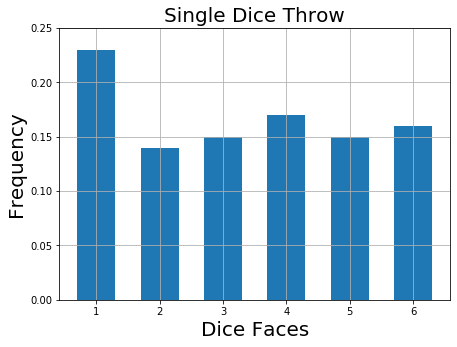

In [2]:
single_dice_throw(n_throws=100)

Well we see that we do not have a rigorous equiprobability of obtaining each face. But this can be improved by increasing the number of dice throws. Let's try 1,000 and 10,000 throws:

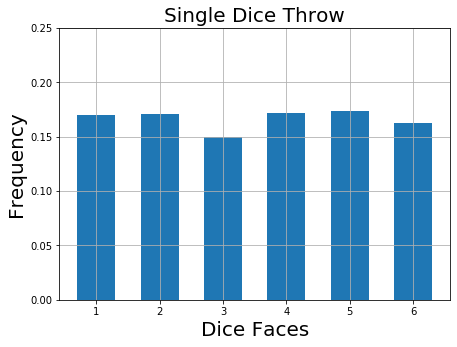

In [3]:
single_dice_throw(n_throws=1000)

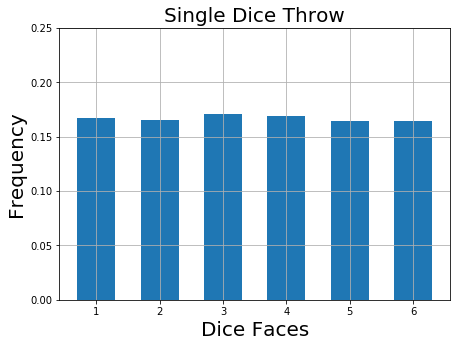

In [4]:
single_dice_throw(n_throws=10000)

This is much better! 

With this experiment we have emphasized a very important limitation of Laplacian probabilities:

> **Probabilities are not frequencies. Probabilities are theoretical limits of frequencies as the number of experiments tends to infinity**.

And to define some important vocabulary:

>**Probabilities are theoretical quantities. Frequencies are measured quantities**.

The definition above is **super very ultra important** for anyone who wishes to understand later Series on fluctuation and confidence intervals. So always keep it in mind!

Food for thought: nothing is truly random in our classical world. Even the numpy random generator is not truly random, because it is based on some internal computer clock. One way of generating truly random numbers would be to use a quantum computer, because true randomness happens in the quantum world (although Einstein would disagree).

<img src='img/01.04.einstein.jpg' width='400'/>

## 3. Example: Throwing two dice
- The experiment: the throw of two dice.
- The random variable $X$ is the result of the dice throw.
- Realizations of $X=\{2, 3, \ldots, 11, 12\}$. This is countable so $X$ is a discrete random variable.
- There's no equiprobability anymore, because some combinations are more likely to pop than others. For instance we are more likely to obtain 7 (1+6, 2+5, 3+4, 4+3, 5+2 or 6+1) than 12 (the only possible combination is 6+6). The lookup table is:

<img src='img/01.05.dice_throw.jpg' width='800'/>

and the graphical representation is:
<img src='img/01.06.histogram.jpg' width='800'/>

One again, let's Pythonize this experiment!

In [5]:
# Function that plots the results of the experiment. 
# It takes as input the number of dice throws.
def two_dice_throw(n_throws):
    # Execute the dice throws
    result_dice_1 = np.random.randint(1, 7, n_throws)
    result_dice_2 = np.random.randint(1, 7, n_throws)
    
    result = result_dice_1 + result_dice_2

    # Plot the result
    fig = plt.figure(figsize=(8,6))

    ax = fig.add_subplot(111)
    plt.hist(result, bins=np.arange(2,14), align='left', rwidth=0.6, density=True)
        
    ax.set_title('Two Dice Throw', fontdict=fontdict)
    ax.set_xlabel('Sum of Dice Faces', fontdict=fontdict)
    ax.set_ylabel('Frequency', fontdict=fontdict)
    ax.set_xticks(np.arange(2,13))
    ax.set_ylim(0, 0.2)

    plt.grid()
    plt.show()

Let's throw our two dice a hundred times:

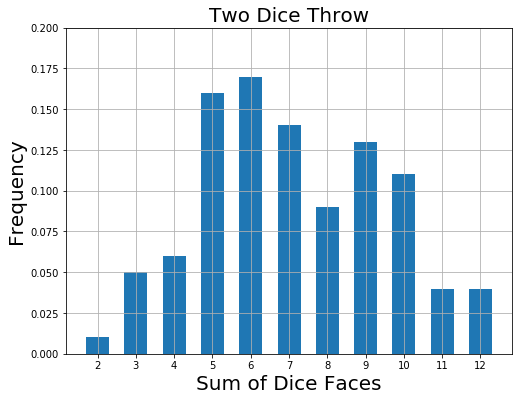

In [6]:
two_dice_throw(100)

Once again, we can see that it doesn't look like the theoretical probability distribution. This can be improved by increasing the number of throws. Let's try 10,000:

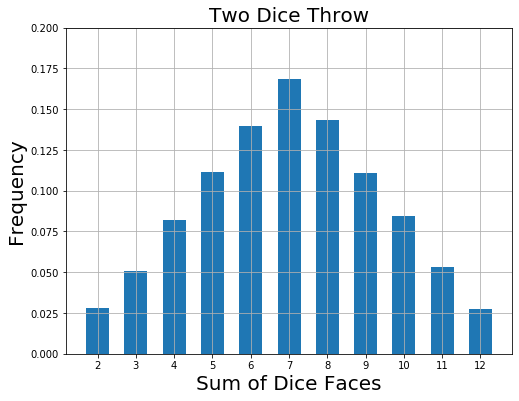

In [7]:
two_dice_throw(10000)

Much better!

## 4. Properties of a discrete random variable
This will basically be some definitions. Let $X$ be a discrete random variable.

> **The expected value (or mean) of $X$ is defined as:**
> $$E(X) = \bar{X} = \sum_i x_i\ p_i$$

The expected value represents, well ..., the expected value :D, that is, the average value that you are expecting to get if you repeat the experiment an infinite number of times. 

It's easy to calculate the expected value once we have the probability distribution in a look-up table. For a single dice throw the probability distribution is:

<img src='img/01.02.dice_throw.jpg' width='500'/>

so the expected value is:
\begin{eqnarray}
 E(X) & = & \left(1\times \frac{1}{6}\right) +  \left(2\times \frac{1}{6}\right) + \left(3\times \frac{1}{6}\right) + \left(4\times \frac{1}{6}\right) + \left(5\times \frac{1}{6}\right) + \left(6\times \frac{1}{6}\right) \\
 E(X) & = & \frac{1}{6}\times(1+2+3+4+5+6) = \frac{21}{6} = 3.5 
\end{eqnarray}

So when we're throwing a dice, we expect to obtain 3.5 in average as the number of throws tends to infinity. Of course 3.5 is impossible to obtain because the dice faces are all integers, but this means that **the dice results will oscillate around this mean value**. 

Let's plot the results of 200 throws in order to visualize these oscillations (the expectation value is in red):

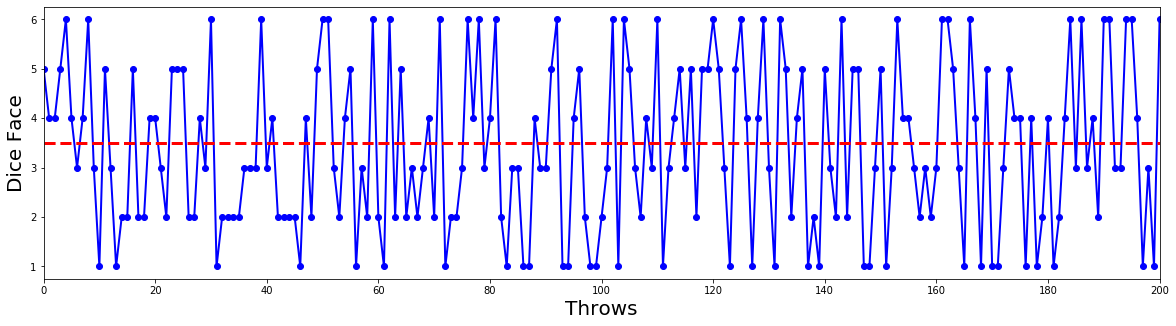

In [8]:
fig = plt.figure(figsize=(20,5))
ax = fig.add_subplot(111)
plt.plot(np.random.randint(1, 7, 201), 'bo-', linewidth=2)
plt.plot([0, 200], [3.5, 3.5], 'r--', linewidth=3)

ax.set_xticks(np.arange(0, 201, 20))
ax.set_xlim(0, 200)
ax.set_xlabel('Throws', fontdict=fontdict)
ax.set_ylabel('Dice Face', fontdict=fontdict)

plt.show()

As mentioned above, we never get the expectation value as a result of the dice throw, but we oscillate around it. There's also a way to **quantify** these oscillations, that is, whether we oscillate close or far from the mean value. This is the **variance** of $X$.

> **The variance of $X$ is defined as:**
> $$ V(X) = E \left( \left[ X-E(X) \right]^2 \right) = E(X^2) - E(X)^2 $$

It is therefore the expectation value of $X^2$ minus the square of the expectation value of $X$. It is also sometimes called the *mean squared deviation* (and seeing the definition, this makes sense) but this can bring confusion because the MSD is also a regression metrics in machine learning. So we'll stick to the name *variance*. 

A simple way to calculate the variance is to draw a table filled with all values of $X$ in columns and to:
1. Calculate the mean $E(X)$.
2. For each value of $X$, calculate the difference $X-E(X)$. Add this as a new column.
3. For each value of $X$, calculate the square of $X-E(X)$. Add this as a new column.
4. Calculate the mean of the square of $X-E(X)$. This is the variance.

For instance, say we have 20 throws of a single dice. The random variable $X$ is the result of each throw. Let's Pythonize this:

In [9]:
# Import pandas for easy visualization of tables
import pandas as pd

# Store the random variable
X = np.random.randint(1, 7, 20)

# Make a table out of it and transpose it for easy reading
table = pd.DataFrame(X, columns=['X']).transpose()

# 1. Calculate the mean of X
mean = X.mean()

# 2. Calculate E(X)-X and add it as a new line. Python will automatically broadcast E(X)
deviation = mean-X
table.loc[1] = deviation
table.rename({1:'E(X)-X'}, inplace=True)

# 3. Calculate the square of the deviation and add it as a new line.
squared_deviation = (mean-X)**2
table.loc[2] = squared_deviation
table.rename({2:'[E(X)-X]^2'}, inplace=True)

# Finally, calculate the variance
variance = squared_deviation.mean()

print('The variance is %0.2f.' %variance)

The variance is 2.90.


While the variance is a good dispersion metrics, it has the limitation that it doesn't share the same units as the random variable $X$. 

For example, if the random variable $X$ denotes the height of 100 random people. The unit of $X$ will be centimeters $({\rm cm})$, unless you're from a strange country that does not use the metric system *wink, wink, wink*. The variance, however, will be in ${\rm cm}^2$ because in the formula we've written above, we're taking the square of the deviation from the mean. Therefore, the variance has units that do not make much sense. This is where the **standard deviation** comes into play.

> **The standard deviation of $X$ is defined as:**
> $$S(X) = \sqrt{V(X)}$$

It's as simple as that. And the big advantage of the standard deviation compared to the variance is that the former shares the same unit as the random variable $X$. It increases the interpretability.

Of course the mean, variance, and standard deviation are quantities that can be calculated easily with numpy:

In [10]:
mean = X.mean()
std = X.std()
print('The mean is %0.2f, the standard deviation is %0.2f, and the variance is %0.2f.' %(mean, std, std**2))

The mean is 3.00, the standard deviation is 1.70, and the variance is 2.90.
